In [1]:
# imports
import numpy as np
import pandas as pd

# set pandas to display the maximum range if necessary
pd.set_option("display.max_rows", None, "display.max_columns", None)

# labels are emotion labels only
labels = ['anger_bf', 'fear_bf', 'joy_bf', 'sadness_bf', 'disgust_bf', 'surprise_bf', 'anger_af', 'fear_af', 'joy_af', 'sadness_af', 'disgust_af', 'surprise_af']
# column names of the imported datasets
col_names = ['id', 'anger_bf', 'fear_bf', 'joy_bf', 'sadness_bf', 'disgust_bf', 'surprise_bf', 'drug_name', 'anger_af', 'fear_af', 'joy_af', 'sadness_af', 'disgust_af', 'surprise_af', 'comments', 'data']

In [2]:
# preprocess the datasets to trim non-relevant values for comparing annotators
def preprocess_datasets(file_path):
    df = pd.read_csv(file_path, sep='\t', names=col_names, skiprows=1)

    # drop columns, replace NaNs with a String 0: easier to deal with all string types, set index as unique_id 
    df = df.drop(['drug_name', 'comments', 'data'], axis=1)
    df = df.replace(np.nan, '0')
    df = df.set_index('id')
    
    return df

In [3]:
# Isabelle's worksheet looks like
df_isa = preprocess_datasets("../worksheets/isabelle_worksheet.tsv")

# solving for a specific bug encountered while converting Isabelle's worksheet
df_isa.at[26323, 'surprise_af'] = '0'

# display trimmed dataset
df_isa.head()

,anger_bf,fear_bf,joy_bf,sadness_bf,disgust_bf,surprise_bf,anger_af,fear_af,joy_af,sadness_af,disgust_af,surprise_af
id,,,,,,,,,,,,
32104,0,0,0,0,0,0,0,0,2 Normal,0,0,0
224119,0,0,0,0,0,0,0,0,0,0,2 Normal,0
28132,0,3 High,0,3 High,0,0,0,1 Low,0,1 Low,0,0
26323,0,0,0,0,0,0,3 High,0,0,0,0,0
165354,0,0,0,0,0,0,3 High,0,1 Low,0,0,0


In [4]:
# Nishan's worksheet looks like
df_n = preprocess_datasets("../worksheets/nishan_worksheet_with_older.tsv")

# display trimmed dataset
df_n.head()

,anger_bf,fear_bf,joy_bf,sadness_bf,disgust_bf,surprise_bf,anger_af,fear_af,joy_af,sadness_af,disgust_af,surprise_af
id,,,,,,,,,,,,
32104,0,0,0,3 High,0,0,0,0,2 Normal,0,0,2 Normal
224119,0,0,0,0,0,0,0,1 Low,0,0,3 High,0
28132,0,3 High,0,3 High,0,0,0,2 Normal,2 Normal,0,0,0
26323,0,0,0,0,0,0,1 Low,2 Normal,0,0,0,0
165354,0,0,0,0,0,0,3 High,0,2 Normal,0,0,0


In [5]:
# vectorize worksheet saving degrees of emotions: Anger, Joy, etc can be between 0 and 3
def vectorize_with_degrees(df):
    scores_with_degree = {}
    
    # retain the first character of the strings from the left and convert them to strings
    for index, row in df.iterrows():
        scores_with_degree[index] = list(map(int, row.str[:1]))
    
    return scores_with_degree

In [6]:
# vectorize worksheet without degrees of emotions: Anger, Joy, etc can be between 0 or 1
# processes degreed dict of lists instead of df
def vectorize_no_degrees(degree_scores):
    scores_no_degree = {}
    
    # if score > 0, then score becomes 1, else 0
    for key, value in degree_scores.items():
        foo = []
        for index in value:
            if index > 0:
                foo.append(1)
            else:
                foo.append(0)
        scores_no_degree[key] = foo
        
    return scores_no_degree

In [7]:
# print the first 5 pairs of keys and lists
def print_dict(score_dict, number_of_rows):
    print({k: score_dict[k] for k in sorted(score_dict.keys())[:number_of_rows]})

In [8]:
# vectorize and print scores
isa_scores_with_degree = vectorize_with_degrees(df_isa)
print_dict(isa_scores_with_degree, 5)

# pass previous dict of lists
isa_scores_no_degree = vectorize_no_degrees(isa_scores_with_degree)
print_dict(isa_scores_no_degree, 5)

{4308: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6528: [1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], 6764: [0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0], 11600: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 13633: [0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0]}
{4308: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 6528: [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 6764: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 11600: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 13633: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]}


In [9]:
# vectorize and print scores
n_scores_with_degree = vectorize_with_degrees(df_n)
print_dict(n_scores_with_degree, 5)

# pass previous dict of lists
n_scores_no_degree = vectorize_no_degrees(n_scores_with_degree)
print_dict(n_scores_no_degree, 5)

{4308: [0, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1], 6528: [2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], 6764: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0], 11600: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 13633: [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0]}
{4308: [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], 6528: [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 6764: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], 11600: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 13633: [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]}


In [10]:
# slice dictionary based on starting and ending point
def slice_dict(dictionary, start, end):
    sliced_dictionary = dict()
    
    for key in dictionary: 
        # slicing till number_of_rows and reassigning 
        sliced_dictionary[key] = dictionary[key][start:end]
        
    return sliced_dictionary

In [11]:
import sklearn
from sklearn.metrics import cohen_kappa_score

# Cohen Kappa Scores
# both annotator scores have the same dimensions, or are normalized
def inter_annotator_agreement(annotator1_scores, annotator2_score, start, end):
    labels = ['unweighted_with_degree', 'linear_with_degree', 'quadratic_with_degree', 'unweighted_no_degree', 'linear_no_degree', 'quadratic_no_degree']
    values = [[], [], [], [], [], []]
    ck_scores = dict(zip(labels, values))
    for key, values in annotator1_scores.items():
        ck_scores[labels[0]].append(cohen_kappa_score(annotator1_scores[key], annotator2_score[key]))
        ck_scores[labels[1]].append(cohen_kappa_score(annotator1_scores[key], annotator2_score[key], weights='linear'))
        ck_scores[labels[2]].append(cohen_kappa_score(annotator1_scores[key], annotator2_score[key], weights='quadratic'))
        ck_scores[labels[3]].append(cohen_kappa_score(annotator1_scores[key], annotator2_score[key]))
        ck_scores[labels[4]].append(cohen_kappa_score(annotator1_scores[key], annotator2_score[key], weights='linear'))
        ck_scores[labels[5]].append(cohen_kappa_score(annotator1_scores[key], annotator2_score[key], weights='quadratic'))
    
    sliced_ck_scores = slice_dict(ck_scores, start, end)
    
    return sliced_ck_scores

In [12]:
# calculate average scores for all lists in the dictionary generated and provide string for display
def averages(dictionary, emotion_degree, start, end):
    display_string = "-----------" + emotion_degree + "-----------\n\n"
    for keys, values in dictionary.items():
        display_string += str(keys) + ": " + str(sum(values)/len(values)) + "\n"
    display_string += "\nStarting point: " + str(start+1) + "\n" + "Ending point: " + str(end) + "\n----------------------***----------------------\n"
    return display_string

In [13]:
def annotator_phase(start, end, choice):
    agreement_with_degree = inter_annotator_agreement(isa_scores_with_degree, n_scores_with_degree, start, end)
    agreement_no_degree = inter_annotator_agreement(isa_scores_no_degree, n_scores_no_degree, start, end)
    
    if choice == "print":
        print(averages(agreement_with_degree, "With Degrees of Emotions", start, end))
        print(averages(agreement_with_degree, "No Degrees of Emotions", start, end))
    elif choice == "values":
        return agreement_with_degree, agreement_no_degree

In [14]:
# rows corresponding to the annotations after the seed annotations
annotator_phase(0, 15, "print")
# rows corresponding to the annotations after the next 50 annotations
annotator_phase(15, 65, "print")

-----------With Degrees of Emotions-----------

unweighted_with_degree: 0.3175011163568026
linear_with_degree: 0.40511746430641343
quadratic_with_degree: 0.46769428416855086
unweighted_no_degree: 0.3175011163568026
linear_no_degree: 0.40511746430641343
quadratic_no_degree: 0.46769428416855086

Starting point: 1
Ending point: 15
----------------------***----------------------

-----------No Degrees of Emotions-----------

unweighted_with_degree: 0.3175011163568026
linear_with_degree: 0.40511746430641343
quadratic_with_degree: 0.46769428416855086
unweighted_no_degree: 0.3175011163568026
linear_no_degree: 0.40511746430641343
quadratic_no_degree: 0.46769428416855086

Starting point: 1
Ending point: 15
----------------------***----------------------

-----------With Degrees of Emotions-----------

unweighted_with_degree: 0.2879090958746287
linear_with_degree: 0.3446560188832838
quadratic_with_degree: 0.3891425185858672
unweighted_no_degree: 0.2879090958746287
linear_no_degree: 0.34465601888

In [15]:
%%script false --no-raise-error
# convert dictionaries into np.arrays for multilabel classification representation
def dict_to_np_array_multiclass(dictionary):
    np_array = np.empty((0, 12), int)
    for key in dictionary:
        np_array = np.append(np_array, np.array([dictionary[key]]), axis=0)
    return np_array

In [16]:
%%script false --no-raise-error
from sklearn.metrics import multilabel_confusion_matrix

# isabelle's annotations for multilabel scores
isa_degree = dict_to_np_array_multiclass(isa_scores_with_degree)
isa_no = dict_to_np_array_multiclass(isa_scores_no_degree)

# nishan's annotations for multilabel scores
n_degree = dict_to_np_array_multiclass(n_scores_with_degree)
n_no = dict_to_np_array_multiclass(n_scores_no_degree)

# first 15
cf_15_degree = multilabel_confusion_matrix(isa_degree[0:15], n_degree[0:15])
cf_15_no = multilabel_confusion_matrix(isa_no[0:15], n_no[0:15])

# next 50
cf_50_degree = multilabel_confusion_matrix(isa_degree[15:66], n_degree[15:66])
cf_50_no = multilabel_confusion_matrix(isa_no[15:66], n_no[15:66])

In [17]:
# convert dictionaries into arrays for binary classification representation
def emo_singleclass(dictionary):
    emo_array = []
    for key in dictionary:
        emo_array += dictionary[key]
    return emo_array

In [18]:
# remove both zero labels
def normalize_for_viz(ar1, ar2):
    ar1_dash = []
    ar2_dash = []
    for index1, index2 in zip(ar1, ar2):
        if index1 == index2 == 0:
            pass
        else:
            ar1_dash.append(index1)
            ar2_dash.append(index2)
    return ar1_dash, ar2_dash

In [19]:
from sklearn.metrics import confusion_matrix

# annotations for binary scores: Emotion with degree present or not present
isa_degree, n_degree = normalize_for_viz(emo_singleclass(isa_scores_with_degree), emo_singleclass(n_scores_with_degree))
isa_no, n_no = normalize_for_viz(emo_singleclass(isa_scores_no_degree), emo_singleclass(n_scores_no_degree))

cf_degree = confusion_matrix(isa_degree, n_degree)
cf_no = confusion_matrix(isa_no, n_no)

<AxesSubplot:>

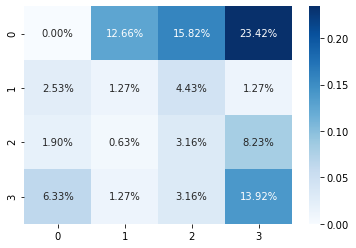

In [20]:
import seaborn as sns

sns.heatmap(cf_degree/np.sum(cf_degree), annot=True, fmt='.2%', cmap='Blues')

<AxesSubplot:>

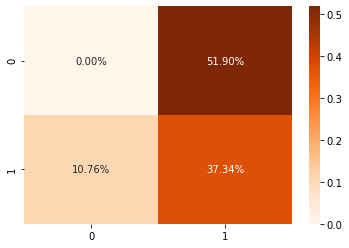

In [21]:
sns.heatmap(cf_no/np.sum(cf_no), annot=True, fmt='.2%', cmap='Oranges')